[*********************100%***********************]  4 of 4 completed
CL=F    2.46
NQ=F    2.11
Name: 2023-06-21 00:00:00, dtype: float64


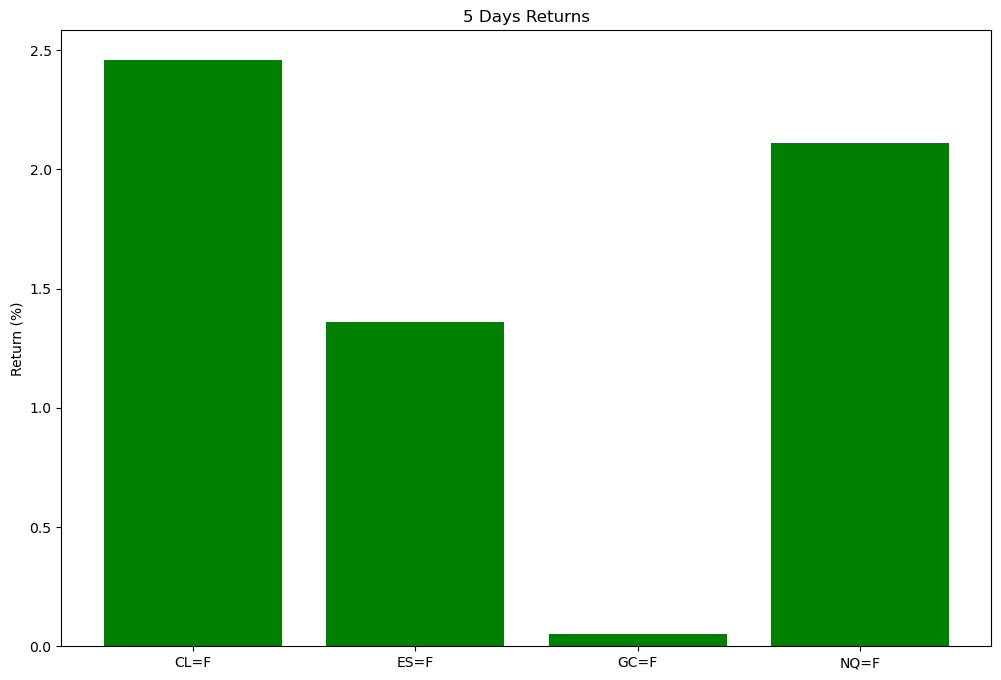

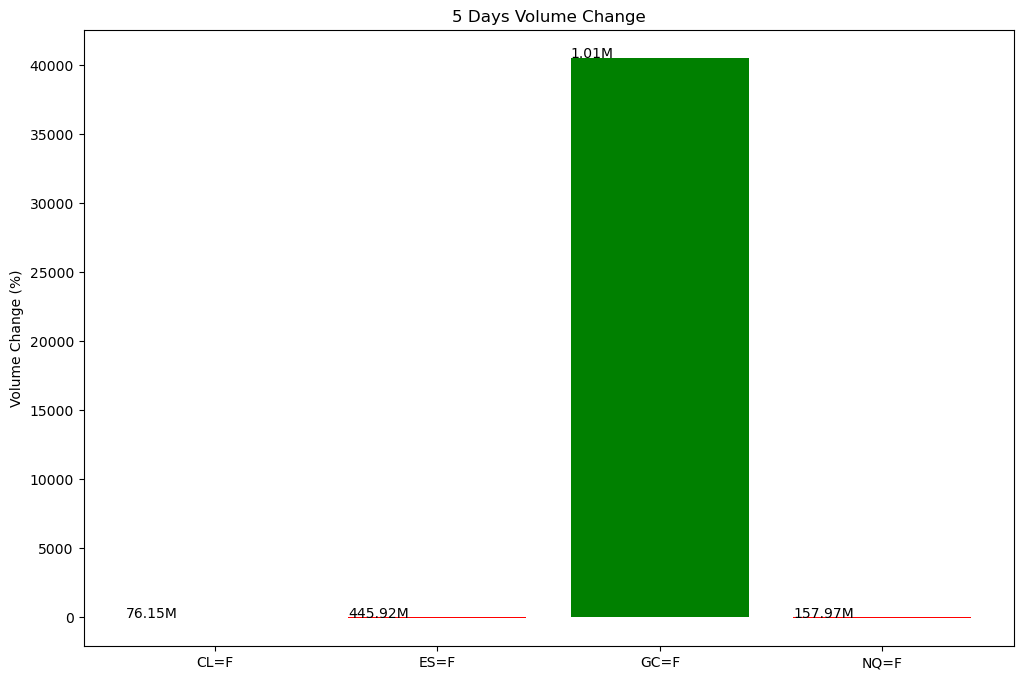

In [7]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# List of tech stocks
stocks = ['ES=F', 'NQ=F', 'CL=F', 'GC=F']

# Download historical data
data = yf.download(stocks, start=(datetime.now() - timedelta(days=365)), end=datetime.now())


# Calculate returns over the past 5 days and format as percentage
returns = (data['Adj Close'].pct_change(5).iloc[-1]*100).round(2)

# Calculate volume change over the past 5 days and format as percentage
volume_change = (data['Volume'].pct_change(2).iloc[-1]*100).round(2)

# Calculate total traded shares over the past 5 days
total_traded = data['Volume'].sum()

# Get the two stocks with the highest returns
top_stocks = returns.nlargest(2)

print(top_stocks)

# Plotting returns
plt.figure(figsize=(12, 8))
bars = plt.bar(returns.index, returns.values, 
               color=['red' if x < 0 else 'Green' for x in returns.values]) # red if value is negative, else Green
plt.title('5 Days Returns')
plt.ylabel('Return (%)')


plt.show()

# Plotting volume change
plt.figure(figsize=(12, 8))
bars = plt.bar(volume_change.index, volume_change.values, 
              color=['red' if x < 0 else 'Green' for x in volume_change.values]) # red if value is negative, else Green
plt.title('5 Days Volume Change')
plt.ylabel('Volume Change (%)')

# Annotate bars with total traded shares
for i, bar in enumerate(bars):
    yval = bar.get_height()
    total_traded_millions = round(total_traded[i] / 1000000, 2)  # format into millions
    plt.text(bar.get_x(), yval + .005, f'{total_traded_millions}M')  # add 'M' to indicate millions

plt.show()

In [4]:
import yfinance as yf
import pandas as pd

# Define VIX
vix = '^VIX'

# Download historical data
data = yf.download(vix, start="2023-06-01", end="2023-06-21")

# Display data
print(data)


[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2023-06-01  17.24  17.59  15.58  15.65      15.65       0
2023-06-02  15.65  15.65  14.42  14.60      14.60       0
2023-06-05  15.28  15.29  14.66  14.73      14.73       0
2023-06-06  14.91  14.97  13.95  13.96      13.96       0
2023-06-07  14.14  14.29  13.77  13.94      13.94       0
2023-06-08  14.14  14.21  13.53  13.65      13.65       0
2023-06-09  13.78  14.14  13.50  13.83      13.83       0
2023-06-12  14.44  15.02  14.32  15.01      15.01       0
2023-06-13  14.99  15.06  14.47  14.61      14.61       0
2023-06-14  14.48  14.73  13.83  13.88      13.88       0
2023-06-15  14.09  14.52  13.79  14.50      14.50       0
2023-06-16  14.49  14.54  13.48  13.54      13.54       0
2023-06-20  14.36  14.67  13.86  13.88      13.88       0


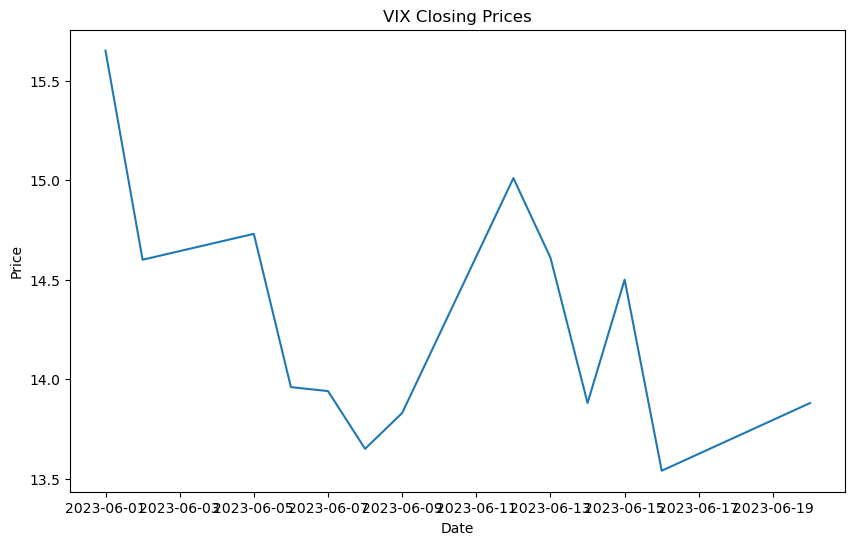

In [5]:
import matplotlib.pyplot as plt

# Plotting the VIX data
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'])
plt.title('VIX Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [6]:
# Calculate percentage change over the last 5 days
vix_change = data['Close'].pct_change(5)

# Get the last value
last_vix_change = vix_change.iloc[-1]

# Convert to percentage and round to 2 decimal places
last_vix_change_percent = round(last_vix_change * 100, 2)

print(f"The VIX has {'increased' if last_vix_change_percent > 0 else 'decreased'} by {abs(last_vix_change_percent)}% over the last 5 days.")


The VIX has decreased by 7.53% over the last 5 days.
